# Chapter 3: Foundational Components of Neural Networks

--------------------------

# The Perceptron

The simplest neural network is the `perceptron`. The `perceptron` was historically and loosely modeled after the biological neuron

Each `perceptron` unit has an **input ($x$)**, an **output ($y$)**, and three "knobs": **set of weights ($w$)**, a **bias($b$)**, and an **activation function ($f$)**

The **weights**and **bias** are learned from the data, and the **activation function** is selected by the programmer.

Mathematically, we can express this as follows:

> $y$ = $f$($wx$ + $b$)

where: 
- $x$ = vector of input values
- $w$ = vector of weights
- $b$ = bias value
- $f$ = activation function

In the above equation, $x$ consists of $n$-number of values and each value has a weight $w$ associated with it. Therefore, we take the `dot product` of the two.

`Activation functions` are **typically nonlinear**. Above, since  ($wx$ + $b$) is a linear function, a `perceptron` is essentially **a composition of a linear and nonlinear function**.

Note: the linear function ($wx$ + $b$) is also known as an `affine transformation`

-------
Below is code showing an implementation of the `perceptron` in pytorch.

Torch's `Linear` class in the **torch.nn** module does the bookkeeping needed for the weights and biases, and also applies the `affine` transformation. 

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class Perceptron(nn.Module):
    """A perceptron is one linear layer"""
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim,1)
        
    def forward(self, x_in):
        """The forward pass through the perceptron
        
        Args:
            x_in (torch.Tensor): an input data tensor
        
        Returns:
            result tensor: tensor.shape should be (batch,)
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()
        
        


# Activation functions

`Activation functions` are nonlinear functions intended to capture complex relationships in data. Many different ones exist, with the most common being:
- sigmoid
- tanH
- ReLu
- softmax


## Sigmoid

`Sigmoid` is one of the earliest activation functions in neural network history. **It takes any real number and squashes it into the range between 0 and 1**.

<font size="5">$f$($x$) = $\frac{1}{1 + e^{-x}}$</font>

As seen in the plot below, `Sigmoid` tends to produce extreme valued outputs very quickly. This is problematic because it can lead to the **gradient becoming zero** or becoming **dangerously small (overloading floating points)**.

Because of this, sigmoid is usually only used in the output layer, where the squashing property allows one to interptet the outputs as probabilities.

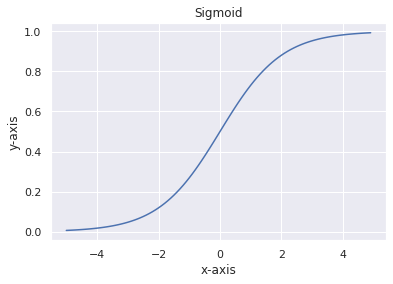

In [2]:
x = torch.arange(-5, 5, .1)
y = torch.sigmoid(x)

sns.set_theme()
plt.title("Sigmoid")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x.numpy(),y.numpy())
plt.show()


## tanh 

`tanh` (hyperbolic tangent) is a variant of **sigmoid**. Its actually a **linear transformation** of sigmoid. Unlike sigmoid, `tanh` maps values to a range of [-1,1]

<font size="5">$f$($x$) = tanh $x$ = $\frac{e^{x}- e^{-x}}{e^{x} + e^{-x}}$</font>

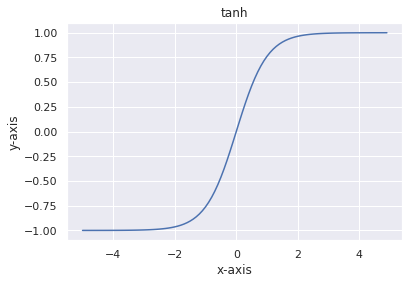

In [3]:
x = torch.arange(-5, 5, .1)
y = torch.tanh(x)

plt.title("tanh")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x.numpy(), y.numpy())
plt.show()

## ReLU

`ReLU` (retified linear unit) is the most widely used activation functions. All `ReLU` does is take the **max** between the value $x$ and 0

$f$($x$) = max(0,$x$)

This clipping effect of `ReLU` helps with the vanishing gradient problem by discarding negative values, but can lead to a problem in which **certain outputs become zero and can never revive again.** 

This is called the `"dying ReLU"` problem and can be mitigated by using variants of ReLU, called ``Leaky ReLU`` and `Parametric ReLU` (PReLU), where $a$ is a learnable parameter

$f$($x$) = max(x,$ax$)



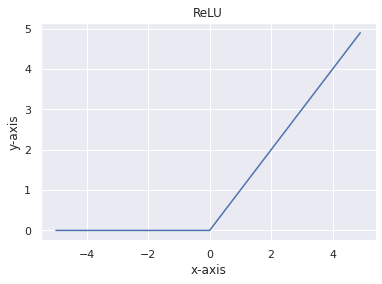

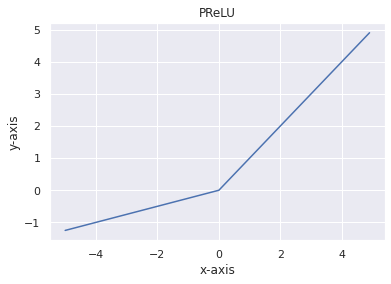

In [4]:
relu = torch.nn.ReLU()

x = torch.arange(-5,5,0.1)
y = relu(x)

plt.title("ReLU")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x.numpy(), y.numpy())
plt.show()


prelu = torch.nn.PReLU(num_parameters=1)
y = prelu(x)

plt.title("PReLU")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x.detach().numpy(), y.detach().numpy())
plt.show()


## Softmax

`Softmax` also squashes values between [0,1]. However, `softmax` also divides each output by the sum of all outputs, which **gives us a discrete probability distribution over $k$ possible classes.**

 <font size="5"> $softmax$ ($x_{i}$) = $\frac{e^{x_{i}}}{\sum_{j=1}^k e^{x_{i}}}$</font>



In [5]:
softmax = nn.Softmax(dim=1) # see\tting dim=1 makes softmax apply to the scalar values within the tensor

x_input = torch.tensor([[.54, .32, .79],
                        [.51, .1, .07]])
y_output = softmax(x_input)

print(x_input)
print(y_output)

softmax = nn.Softmax(dim=0) # dim=0 makes softmax apply column-wise

x_input = torch.tensor([[.54, .32, .79],
                        [.51, .1, .07]])
y_output = softmax(x_input)
print("~"*30)
print(x_input)
print(y_output)


tensor([[0.5400, 0.3200, 0.7900],
        [0.5100, 0.1000, 0.0700]])
tensor([[0.3240, 0.2600, 0.4160],
        [0.4333, 0.2876, 0.2791]])
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
tensor([[0.5400, 0.3200, 0.7900],
        [0.5100, 0.1000, 0.0700]])
tensor([[0.5075, 0.5548, 0.6726],
        [0.4925, 0.4452, 0.3274]])


# Common Loss Functions

`Loss functions` (or objective functions) help guide the training algorithm to pick the correct parameters by looking at the data. 

Loss functions compute an **error value** between the `target y-value` ($y$) and the models `predicted y-value` ($\hat{y}$)

The goal of `stochastic gradient descent` is to minimize the error as best as it can. Higher error = worse predictions


## Mean squared error

`Mean squared error` (MSE) is a common loss function used for **regression** problems. That is, when we are trying to **predict a continuous value**.

 <font size="5"> $L_{MSE}(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^n(y - \hat{y})^2$ </font>

Other options for regression exist such as `RMSE` (root mean squared error), `MAE` (mean absolute error), `R-squared` 

In [17]:
mse_loss = nn.MSELoss()
outputs = torch.randn(3,5, requires_grad=True)
targets = torch.randn(3,5)

loss = mse_loss(outputs, targets)
print(loss)

tensor(1.1615, grad_fn=<MseLossBackward0>)


## Categorical Cross Entropy

`Categorical cross entropy` is typically used in **multiclass classification** in which the outputs are interpreted as predictions of class membership probabilities.

The **target** ($y$) is a vector of $n$ elements that represents the true multinomial distribution over all the classes. 

If only one class is correct, this vector is a one-hot. The network's output ($\hat{y}$) is also a vector of $n$ elements, but represents the network's prediction of the multinomial distribution. 

Categorical cross entropy will compare these two vectors ($y,\hat{y}$) to measure the loss

<font size="5"> $L_{cross\_entropy}(y, \hat{y}) = - \sum_{i}y_{i}log(\hat{y}_{i})$ </font>

In the code below a vector of random values is used to simulate network outputs. 

Then a **targets** vector of integers is created. 

`nn.CrossEntropyLoss()` assumes that each input has one particular class, and each class has a unique index. This is why the **targets** vector has three elements: an index representing the correct class for each input.




In [21]:
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3,5, requires_grad=True)
targets = torch.tensor([1,0,3], dtype=torch.int64)
loss = ce_loss(outputs, targets)

print(outputs)
print(targets)
print(loss)

tensor([[ 0.2535,  0.1372,  1.8722, -1.2940, -0.7986],
        [-1.3005, -0.1062,  0.7338,  0.2320,  0.2256],
        [-0.8215,  1.3480, -0.7388, -0.3489,  1.1995]], requires_grad=True)
tensor([1, 0, 3])
tensor(2.5689, grad_fn=<NllLossBackward0>)


## Binary Cross Entropy

For **binary classification**, we have `binary cross entropy` as well. 

In the cose below, we create a **binary probability output vector**, *probabilities*, using the `sigmoid` activation function on a random vector that represents the network's output. 

Next, the ground truth (**targets**) is instantiated as a vector of 0s and 1s. These are both of our classes.

In [24]:
bce_loss = nn.BCELoss()
siggy = nn.Sigmoid()

probabilities = siggy(torch.randn(4,1,requires_grad=True))
targets = torch.tensor([1,0,1,0], dtype=torch.float32).reshape(4,1)
loss = bce_loss(probabilities, targets)

print(probabilities)
print(targets)
print(loss)

tensor([[0.6400],
        [0.5035],
        [0.9575],
        [0.7901]], grad_fn=<SigmoidBackward0>)
tensor([[1.],
        [0.],
        [1.],
        [0.]])
tensor(0.6877, grad_fn=<BinaryCrossEntropyBackward0>)


# Optimizers

`Stochastic gradient descent` is the classic optimization algorithm, but it runs into convergence problems with more difficult optimization tasks.

The current preferred optimizers are `Adam` and `Adagrad`

In [26]:
input_dim = 2
lr = 0.001

perceptron = Perceptron(input_dim=input_dim)
bce_loss = nn.BCELoss()
optimizer = optim.Adam(params=perceptron.parameters(), lr=lr)